# 1. Exploratory Analysis 
Author: Philip Kalinda

## Summary

This Notebook is to explore the data and get a feel for the data.

This will help in the development of ideas on how we can explore the data beyond traditional business intelligence.

These ideas will form the hypotheses which we then explore with the use of Data science, leveraging statistics and machine learning.

The findings of the analysis will be further analysed in order to form value-adding strategies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# settings
sns.set_style('whitegrid')
shopColors = ['#EC5D24','#93134A','#F7F5E8','#2B2C30','#336E7B','#F2931A']
sns.set_palette(shopColors)
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 60)
pd.set_option("display.latex.repr", True)

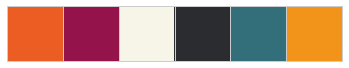

In [2]:
sns.palplot(shopColors) # Stay on brand

In [3]:
# raw data
data = pd.read_csv('CustomerData.csv')

## 1.2 Explore

### 1.2.1 Descriptive

In [4]:
print("Number of Rows: {}\nNumber Of Features: {} ".format(
    data.shape[0],
    data.shape[1]))

Number of Rows: 120767
Number Of Features: 7 


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120767 entries, 0 to 120766
Data columns (total 7 columns):
shoppingOrder     120767 non-null int64
channel           120767 non-null object
quantity          120767 non-null int64
customerID        120767 non-null object
weekdayInteger    120767 non-null int64
productID         120767 non-null object
storeID           120767 non-null object
dtypes: int64(3), object(4)
memory usage: 6.4+ MB


In [6]:
data.head()

,shoppingOrder,channel,quantity,customerID,weekdayInteger,productID,storeID
0,3,STR,2,b750f55d85bdac831175b4ece10033550c973e82503694...,4,086f5af48d6f7fac1357083454e346d2df02c5156241ee...,c5422e8ad47366dc4a45968054a9629c875482a22c2f42...
1,3,STR,1,b750f55d85bdac831175b4ece10033550c973e82503694...,4,8981a704b6bbaa5905426856431e9982ea7d8b3e16a0d7...,8b5b99fba4cb7bdb35a45b23d121c4442acaa8a6acaf42...
2,3,STR,1,b750f55d85bdac831175b4ece10033550c973e82503694...,4,f2a050cc4c05b21e18bfb12d83bc35a024a8ef3421b973...,8b5b99fba4cb7bdb35a45b23d121c4442acaa8a6acaf42...
3,5,STR,1,b750f55d85bdac831175b4ece10033550c973e82503694...,1,ff7e584322603a95a820eef0c56d1da0bbf4b869b4e2d5...,a9661b8084a8e44309e042f2638be7582dd9480fddb708...
4,5,STR,1,b750f55d85bdac831175b4ece10033550c973e82503694...,1,37686ea91f4b4002c080da122d40a693271c753ca63d7e...,a9661b8084a8e44309e042f2638be7582dd9480fddb708...


Here we can see that each row is of data is specific to the product purchased and the order number. Each row contains data relating to the product purchased partitioned by the shopping order, eg. the order number, channel, quantity, customer, weekday and store that that particular product was purchased. This means that if a productID appears multiple times under the same customer id, it is from a different order, and if the product appears multiple times with the same shopping order, it is likely to be a different customer who happened to purchase that item in their shopping order.

In [7]:
data.describe(include='all')

,shoppingOrder,channel,quantity,customerID,weekdayInteger,productID,storeID
count,120767.000000,120767,120767.000000,120767,120767.000000,120767,120767
unique,NaN,2,NaN,1000,NaN,17368,277
top,NaN,STR,NaN,e3f888be4e84ded301555dcf7447793e456c3cc8e1110f...,NaN,b2ba2185b1b07a4f60816d81a868a7d7cd176088b6e1a7...,66d0f07d67e0b9708bb6031797cdd5a96c01fa567f2b10...
freq,NaN,108904,NaN,612,NaN,1259,33202
mean,8.019235,NaN,1.176820,NaN,3.339546,NaN,NaN
std,6.961022,NaN,0.670694,NaN,1.995292,NaN,NaN
min,1.000000,NaN,-13.000000,NaN,0.000000,NaN,NaN
25%,3.000000,NaN,1.000000,NaN,2.000000,NaN,NaN
50%,6.000000,NaN,1.000000,NaN,4.000000,NaN,NaN
75%,11.000000,NaN,1.000000,NaN,5.000000,NaN,NaN


In [8]:
print("Shopping Order's Max Value stds: ",
      round(data.shoppingOrder.max() - data.shoppingOrder.mean() / data.shoppingOrder.std(),2),
      'stds')
print("Quantity's Max Value stds: ",
      round(data.quantity.max() - data.quantity.mean() / data.quantity.std(),2), 
      'stds')

Shopping Order's Max Value stds:  56.85 stds
Quantity's Max Value stds:  46.25 stds


Firstly, we can see that there are no null values, so we will not have to worry about imputing or removing data to create a full dataset

Here we can already see that shoppingOrder and quantity have extremely high max values. This could indicate that the data is skewed, especially since they are beyond 40 standard deviations from the mean.

We can also see that quantity has negative values. With no way to verify whether this is bad data or not, we will make an assumption that these are refunded items within the order. 

Here we can also see that there are 1000 customers, 17368 different products, 277 different stores, and 2 channels.

### 1.2.2 Popular Products

In [9]:
data.productID.value_counts().head()

b2ba2185b1b07a4f60816d81a868a7d7cd176088b6e1a789e409e39543a8550a    1259
5b1c832b259948b35fa18c6b22bd118dd45f08749b00d90efd9d250d22eb66cb    1129
f2a050cc4c05b21e18bfb12d83bc35a024a8ef3421b973b5ffb972d819640ed0     914
8981a704b6bbaa5905426856431e9982ea7d8b3e16a0d72e29559083b5ac3a47     899
e22967eef7d091fe5475af59c458053b9af34d93c11784201f44187c8d65b30d     703
Name: productID, dtype: int64

Here we can see that these productIDs are the most popular items within orders.

In [10]:
data.groupby(by='productID').sum().sort_values(
    'quantity',
    ascending=False).quantity.head()

productID
5b1c832b259948b35fa18c6b22bd118dd45f08749b00d90efd9d250d22eb66cb    1609
b2ba2185b1b07a4f60816d81a868a7d7cd176088b6e1a789e409e39543a8550a    1295
f2a050cc4c05b21e18bfb12d83bc35a024a8ef3421b973b5ffb972d819640ed0     914
8981a704b6bbaa5905426856431e9982ea7d8b3e16a0d72e29559083b5ac3a47     900
526f666244e147c6b6c1937ce42bd727f298db5ace9fc8a4c8d792fb8c717fd2     767
Name: quantity, dtype: int64

Here we can see that these productIDs are the most purchased items with regards to quantity purchased.

### 1.2.3 Customer Grouping

In [11]:
data.groupby(by='customerID').max().sort_values(
    'shoppingOrder',
    ascending=False).sample(5)

,shoppingOrder,channel,quantity,weekdayInteger,productID,storeID
customerID,,,,,,
f786cf621e94ee84b497d049d13c56074ad82f408e652e5bd98017372ea98153,18,STR,6,5,ff2a5e99abedfbbcac0cce0952fa2613e370eb915c6202...,9123ae8dce2dd538b2418d75463bab5e54131b95908caa...
f1307bde3f4f0f6b63c4593bb794668513e9e13b15a9e4b33bc268477c17db0d,2,STR,2,4,ff65dadf28bd5675d9d98b3721d41f0ae34cad253d4cf5...,c5422e8ad47366dc4a45968054a9629c875482a22c2f42...
97894c0cd38d16e6580b1c69336f73ae518c7afdae430e4ec9da99292136951b,10,STR,2,6,ffc162556543587ce0954986b964b74b0230843a634f63...,cc81aa871c75547b0b23f8f1e77d6b0f5062702bde5363...
6ddc37c14ec4a736d7dcec7b6a633db385bdad9fd34b4a22db27f88ca06a12fb,4,STR,2,6,f77760cf294dfd434eeae32682e19a657ee1067f1a55e1...,cc81aa871c75547b0b23f8f1e77d6b0f5062702bde5363...
b0aa61ecfd9c8214455d88b6689c1bf1f9c79d12f2878228c8d3e7d848e76e8d,4,STR,5,6,ff2df4b580cd4463b064188a59f2cf719a277712dd46b2...,244fdfacd3e3046ec05ebe18d93653d535604a54cd1373...


### 1.2.4 Channel Grouping

In [12]:
data.channel.value_counts()

STR    108904
WEB     11863
Name: channel, dtype: int64

Here we can se that there are almost 10 times more store purchases than there are web purchases.

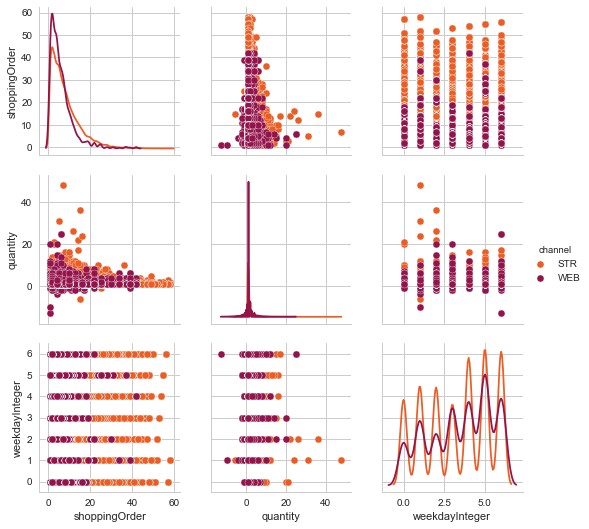

In [13]:
plt.figure(figsize=(9,9),dpi=250)
sns.pairplot(data, diag_kind='kde', hue='channel')
plt.show()

Here we can see the shape of the data with regards to the channel of the order are very similar.

### 1.2.5 Orders Grouping

Given the structure of the raw data, there is no one column that can be aggregated against in order to count the number of orders in the dataset. In order to get the number of unique orders, the shoppingOrder and the customerID must be concatenated in order to produce an order specific key.

In [14]:
data['orderID']=data.loc[:,'shoppingOrder'].astype(str)+'-'+data.loc[:,'customerID']

In [15]:
print("Number of Orders:",len(set(data['orderID'])))

Number of Orders: 11155


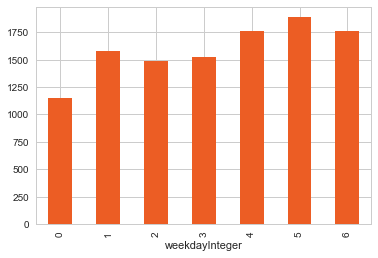

In [16]:
data.groupby(by='weekdayInteger').orderID.nunique().plot(kind='bar')
plt.show()

Here we can see that more orders take place on friday saturday and sunday. This makes sense and is expected.

### 1.2.6 Quality Checks

The data is clean with regards to order numbers and the number of weekdays. 

The below code is to check if there are any customers that have had any one order assigned to multiple weekdays. This would be bad data as the assumption is made that an order can only occur on one day.

In [17]:
badData = []
for customer in set(data.customerID):
    for order in set(data[data.customerID==customer].shoppingOrder):
        if len(set(
            data[(data.customerID==customer)
                 &(data.shoppingOrder==order)].weekdayInteger)) > 1:
            badData.append((customer,
                            order,
                            set(data[
                                (data.customerID==customer)
                                &(data.shoppingOrder==order)].weekdayInteger)))
            print("Customer:",
                  customer,
                  "Shopping Order:",
                  order, "Weekdays:",
                  set(data[
                      (data.customerID==customer)
                      &(data.shoppingOrder==order)].weekdayInteger))
            
print('There are {} customers that failed the data quality check.'.format(len(badData)))
print(badData)

There are 0 customers that failed the data quality check.
[]


### 1.2.7 Repeated Products in Orders

Here we can see how many orders a customer has included each product. We can add this to the end of the dataset to then use later as a feature. this number will remain constant accross all orders specific to customers and products.

In [18]:
repeatPurchase = data.pivot_table(
    index=['customerID','productID'],
    aggfunc=len)['shoppingOrder']

In [32]:
pd.DataFrame(repeatPurchase).head()

shoppingOrder
customerID                                         productID                                                        
0072c7c58d8c992912abf1a5879094f3e291e09491fd9b6... 0891ba4e663a73978ee81cb3006ecc1e23997f0b1138430...              1
                                                   5171c79c601f67714c94682c5ee88265c2229d670a33408...              1
                                                   68dbb52c42d24b2aad4e1696d24a9b5a757ebc2983a159a...              2
                                                   8f0ef12d454c27df6a17465319c5303a7155541cceb0c97...              1
                                                   b2ba2185b1b07a4f60816d81a868a7d7cd176088b6e1a78...              1

In [20]:
data['ordersRepeated'] = data.loc[:,['customerID','productID']].apply(
    lambda row: repeatPurchase[(row[0],row[1])],axis=1)

### 1.2.8 Total Quantity of Product Purchased 

Below we do a similar thing to the orders repeated except we total quantity of the product that has been purchased and append this to the main dataset for potential later use.

In [21]:
totalProductPurchase = data.pivot_table(
    index=['customerID','productID'],
    aggfunc=sum)['quantity']

In [31]:
pd.DataFrame(totalProductPurchase).head()

quantity
customerID                                         productID                                                   
0072c7c58d8c992912abf1a5879094f3e291e09491fd9b6... 0891ba4e663a73978ee81cb3006ecc1e23997f0b1138430...         1
                                                   5171c79c601f67714c94682c5ee88265c2229d670a33408...         1
                                                   68dbb52c42d24b2aad4e1696d24a9b5a757ebc2983a159a...         3
                                                   8f0ef12d454c27df6a17465319c5303a7155541cceb0c97...         1
                                                   b2ba2185b1b07a4f60816d81a868a7d7cd176088b6e1a78...         1

In [23]:
data['totalProductPurchase'] = data.loc[:,['customerID','productID']].apply(
    lambda row: totalProductPurchase[(row[0],row[1])],
    axis=1)

### 1.2.9 Within Last Order

Here We label each row with a boolean value indicating whether or not the product was purchased in the last one and two orders. A custom function below is used to calculate this.

In [24]:
previousOrder = pd.DataFrame(data.pivot_table(
    index=['customerID','productID','shoppingOrder'],
    aggfunc=sum)['quantity'])

In [30]:
previousOrder.head()

quantity
customerID                                         productID                                          shoppingOrder          
0072c7c58d8c992912abf1a5879094f3e291e09491fd9b6... 0891ba4e663a73978ee81cb3006ecc1e23997f0b1138430... 2                     1
                                                   5171c79c601f67714c94682c5ee88265c2229d670a33408... 1                     1
                                                   68dbb52c42d24b2aad4e1696d24a9b5a757ebc2983a159a... 2                     2
                                                                                                      4                     1
                                                   8f0ef12d454c27df6a17465319c5303a7155541cceb0c97... 1                     1

In [26]:
def previousOrderFucntion(row,x):
    try:
        return bool(
            previousOrder.get_value(
                index=(row[0],row[1],row[2]-x),
                col='quantity'))
    except:
        return bool(0)

In [27]:
data['productWithinLastOrder'] = data.loc[:,['customerID','productID','shoppingOrder']].apply(
    lambda row: previousOrderFucntion(row,1),
    axis=1)
data['productWithinLast2Orders'] = data.loc[:,['customerID','productID','shoppingOrder']].apply(
    lambda row: previousOrderFucntion(row,2),
    axis=1)

## 1.3 Export

Here we will export our data into the next Notebook which will be used to generate new datasets which we will use in our analyses.

In [28]:
data.head()

,shoppingOrder,channel,quantity,customerID,weekdayInteger,productID,storeID,orderID,ordersRepeated,totalProductPurchase,productWithinLastOrder,productWithinLast2Orders
0,3,STR,2,b750f55d85bdac831175b4ece10033550c973e82503694...,4,086f5af48d6f7fac1357083454e346d2df02c5156241ee...,c5422e8ad47366dc4a45968054a9629c875482a22c2f42...,3-b750f55d85bdac831175b4ece10033550c973e825036...,1,2,False,False
1,3,STR,1,b750f55d85bdac831175b4ece10033550c973e82503694...,4,8981a704b6bbaa5905426856431e9982ea7d8b3e16a0d7...,8b5b99fba4cb7bdb35a45b23d121c4442acaa8a6acaf42...,3-b750f55d85bdac831175b4ece10033550c973e825036...,3,3,False,True
2,3,STR,1,b750f55d85bdac831175b4ece10033550c973e82503694...,4,f2a050cc4c05b21e18bfb12d83bc35a024a8ef3421b973...,8b5b99fba4cb7bdb35a45b23d121c4442acaa8a6acaf42...,3-b750f55d85bdac831175b4ece10033550c973e825036...,1,1,False,False
3,5,STR,1,b750f55d85bdac831175b4ece10033550c973e82503694...,1,ff7e584322603a95a820eef0c56d1da0bbf4b869b4e2d5...,a9661b8084a8e44309e042f2638be7582dd9480fddb708...,5-b750f55d85bdac831175b4ece10033550c973e825036...,1,1,False,False
4,5,STR,1,b750f55d85bdac831175b4ece10033550c973e82503694...,1,37686ea91f4b4002c080da122d40a693271c753ca63d7e...,a9661b8084a8e44309e042f2638be7582dd9480fddb708...,5-b750f55d85bdac831175b4ece10033550c973e825036...,1,1,False,False


In [29]:
data.to_csv('datasets/alteredRawData.csv')

## END